# **Problem Statement**  
## **35. Visualize decision boundaries of different classifiers.**

Visualize decision boundaries of different classification algorithms on a 2D dataset to understand how each classifier separates data points.

Classifiers to visualize:
- K-Nearest Neighbors (KNN)
- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree

### Constraints & Example Inputs/Outputs

### Constraints
- Dataset must have 2 features (for 2D visualization)
- Models must support predict()
- Decision boundary visualization requires a mesh grid
- Non-linear classifiers may produce complex boundaries

### Example Input:
```python
X = [[x1, x2], ...]
y = [0, 1]

```

Expected Output:
```python
• 2D plot
• Colored regions → model predictions
• Points → actual labels

```

### Solution Approach

**Step 1: Generate a 2D Dataset**
- Use a synthetic dataset (e.g., blobs or moons).

**Step 2: Train Multiple Classifiers**
- Train different models on the same dataset.

**Step 3: Create Mesh Grid**
- Generate a grid over feature space to evaluate predictions.

**Step 4: Plot Decision Boundary**
- Predict labels for grid points and visualize using contours.

### Solution Code

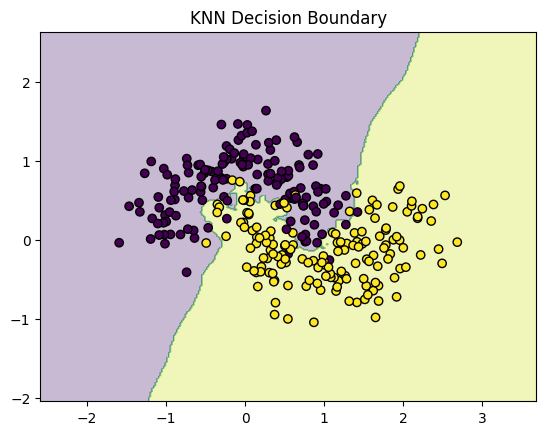

In [1]:
# Approach 1: Brute Force: Visualize Decision Boundary for One Classifier Only

# Import Dependencies
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

# Create Dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Train Single Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Plot Decision Boundary (Manual / Single Model)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.title("KNN Decision Boundary")
plt.show()


### Alternative Solution

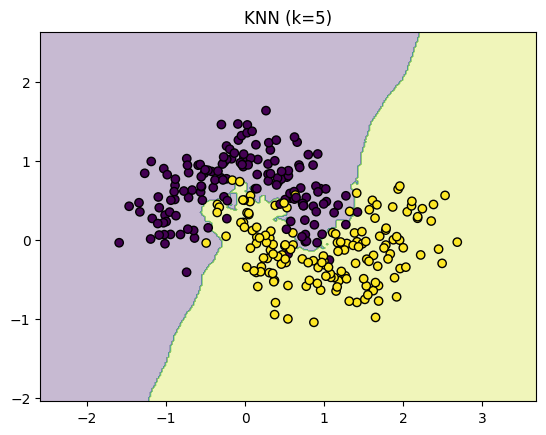

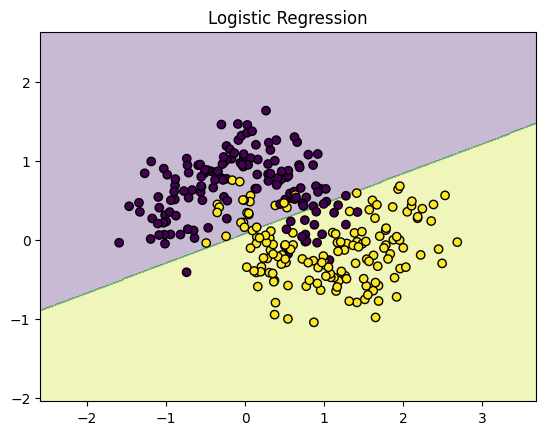

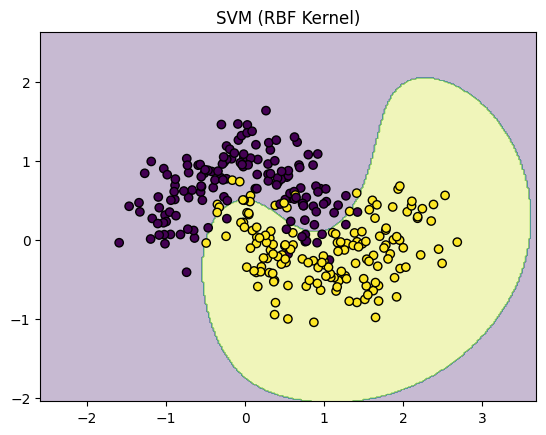

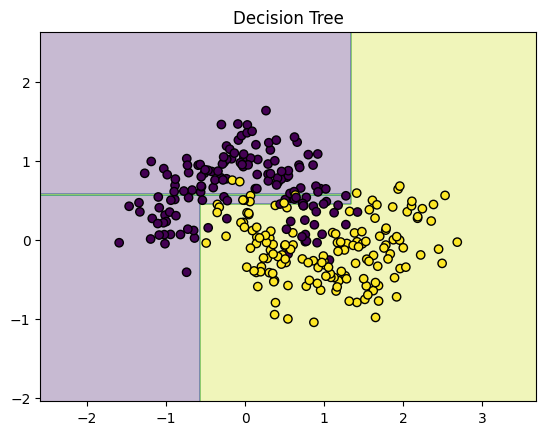

In [3]:
# Approach 2: Optimized: Reusable Visualization for Multiple Classifiers

# Import Dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define Generic Decision Boundary Function
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(title)
    plt.show()

# Train & Visualize Multiple Classifiers
models = {
    "KNN (k=5)": KNeighborsClassifier(5),
    "Logistic Regression": LogisticRegression(),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(max_depth=4)
}

for name, model in models.items():
    model.fit(X, y)
    plot_decision_boundary(model, X, y, name)


### Alternative Approaches

**Brute Force**
- Hard-code grid + plotting for each classifier

**Optimized**
- Reusable plotting function ✅
- Subplots for comparison
- Animate boundaries for parameter changes

### Test Case

In [4]:
# Test Case 1: Check Dataset Shape
X.shape, y.shape


((300, 2), (300,))

In [5]:
# Test Case 2: Train Single Model Prediction
models["Logistic Regression"].predict(X[:5])


array([1, 1, 0, 0, 1])

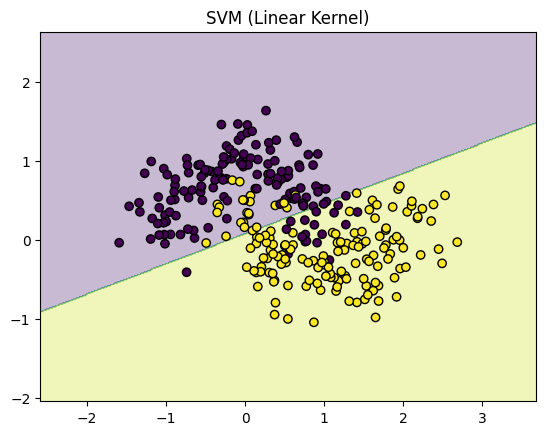

In [6]:
# Test Case 3: Change Hyperparameter & Re-Plot
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)
plot_decision_boundary(svm_linear, X, y, "SVM (Linear Kernel)")


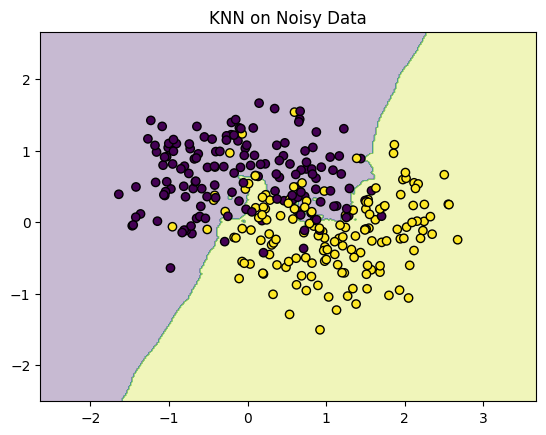

In [7]:
# Test Case 4: Different Dataset (Harder Boundary)
X2, y2 = make_moons(n_samples=300, noise=0.4, random_state=1)
model = KNeighborsClassifier(7)
model.fit(X2, y2)
plot_decision_boundary(model, X2, y2, "KNN on Noisy Data")


### Expected Outputs
- Clear separation regions
- Different boundary shapes per model
- Linear vs non-linear behavior visible
- Overfitting visible for trees/KNN with high complexity

## Complexity Analysis

Let:
- G = number of grid points
- N = number of training samples

### Prediction Cost
- KNN: O(G × N)
- Logistic Regression: O(G × d)
- SVM (RBF): O(G × SV)
- Decision Tree: O(G × depth)

### Space Complexity
- O(G) for mesh grid

#### Thank You!!